In [268]:
import pandas as pd
%matplotlib inline

In [307]:
expected_count = 1+(3./5.)

In [301]:
filename = "../firestorm_environment/out.log"

In [302]:
# lines in the log file follow 1 of 2 conventions:
#  local> nodeid count
#  remote> nodeid nodeid count
contents = open(filename,'r').read().split('\n')
local = [x.split('\t')[1:] for x in contents if x.startswith('local>')]
remote = [x.split('\t')[1:] for x in contents if x.startswith('remote>')]

In [303]:
raw_local = pd.DataFrame.from_records(local)
localdf = pd.DataFrame()
for nodeid in raw_local[1].unique():
    tmp = raw_local[raw_local[1] == nodeid].set_index(0)
    localdf[nodeid] = tmp[2].astype(int)

:4041    0.957860
:4036    0.960562
:4035    0.963541
:4043    0.992460
dtype: float64


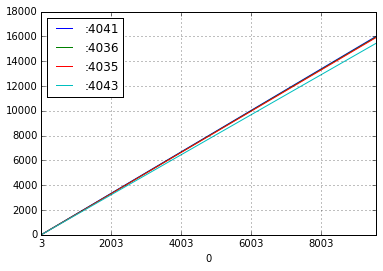

In [308]:
localdf.plot()
print localdf.count()*expected_count / (localdf.max() - localdf.min())

In [310]:
raw_remote = pd.DataFrame.from_records(remote)
remotedfs = {}
for nodeid in raw_remote[0].unique():
    print 'start',nodeid
    tmp = raw_remote[raw_remote[0] == nodeid]
    tmp = tmp.set_index(1)
    for node in tmp[2].unique():
        tmp_node = tmp[tmp[2] == node].drop_duplicates()
        tmp[node] = tmp_node[3].astype(int)
    tmp = tmp[tmp[2].unique()]
    if nodeid in tmp.columns:
        del tmp[nodeid]
    remotedfs[nodeid] = tmp

start :4041
start :4036
start :4035
start :4043


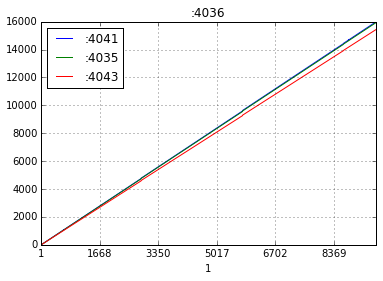

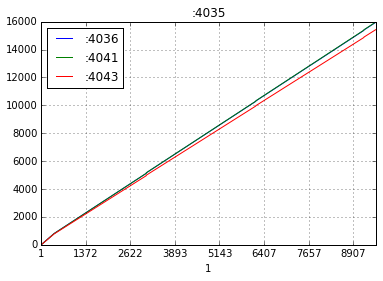

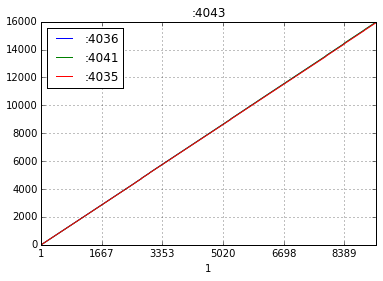

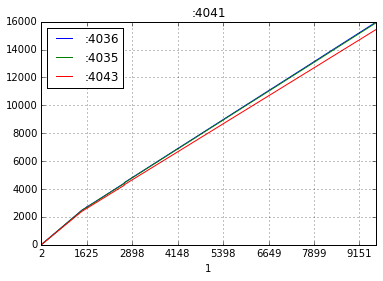

In [294]:
for node, df in remotedfs.items():
    ax = df.plot()
    fig = ax.get_figure()
    ax.set_title(node)

In [311]:
for node, df in remotedfs.items():
    print node
    print df.index.astype(int).max()*expected_count / (df.max() - df.min())

:4036
:4041    0.959459
:4035    0.963014
:4043    0.994101
dtype: float64
:4035
:4036    0.958897
:4041    0.957877
:4043    0.991706
dtype: float64
:4043
:4036    0.929563
:4041    0.928690
:4035    0.931549
dtype: float64
:4041
:4036    0.962787
:4035    0.966055
:4043    0.996111
dtype: float64


In [312]:
#TODO: make a network graph with all the nodes where 
#the edges are labeled with how strong the connection 

In [331]:
import networkx as nx
G = nx.Graph()
for node in remotedfs.keys():
    G.add_node(node)
G.add_node(':4034') # root node
root_edges =localdf.count()*expected_count / (localdf.max() - localdf.min())
for node, goodness in root_edges.iteritems():
    G.add_edge(':4034', node, prr='{0:0.2f}'.format(goodness))
for node, df in remotedfs.items():
    node_edges = df.index.astype(int).max()*expected_count / (df.max() - df.min())
    for node2, goodness in node_edges.iteritems():
        G.add_edge(node, node2, prr='{0:0.2f}'.format(goodness))

{':4034': <matplotlib.text.Text at 0x7f665a272dd0>,
 ':4035': <matplotlib.text.Text at 0x7f665929e250>,
 ':4036': <matplotlib.text.Text at 0x7f6659b73e10>,
 ':4041': <matplotlib.text.Text at 0x7f665929ead0>,
 ':4043': <matplotlib.text.Text at 0x7f665929e690>}

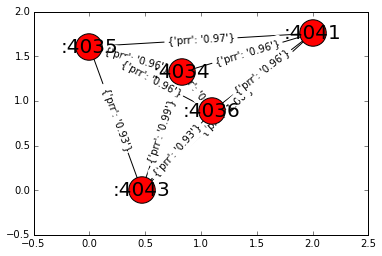

In [334]:
pos = nx.spring_layout(G, scale=2.0)
nx.draw_networkx_nodes(G,pos,node_size=700)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_edge_labels(G,pos)
nx.draw_networkx_labels(G,pos,font_size=20)